In [1]:
# https://www.kaggle.com/henriquebas/analyzing-the-employee-turnover-hr-dataset

In [10]:
# Import the neccessary libraries for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'hadPromotion',
                        'Department' : 'department',
                        })
df.tail()

satisfaction  evaluation  projectCount  averageMonthlyHours  \
14994          0.40        0.57             2                  151   
14995          0.37        0.48             2                  160   
14996          0.37        0.53             2                  143   
14997          0.11        0.96             6                  280   
14998          0.37        0.52             2                  158   

       yearsAtCompany  workAccident  left  hadPromotion department salary  
14994               3             0     1             0    support    low  
14995               3             0     1             0    support    low  
14996               3             0     1             0    support    low  
14997               4             0     1             0    support    low  
14998               3             0     1             0    support    low

In [19]:
print('Turnover rate was: %.2f%%' % (len(df[df.left == 1]) / len(df) * 100))

Turnover rate was: 23.81%


In [20]:
df.shape


(14999, 10)

In [21]:
df.describe()

satisfaction    evaluation  projectCount  averageMonthlyHours  \
count  14999.000000  14999.000000  14999.000000         14999.000000   
mean       0.612834      0.716102      3.803054           201.050337   
std        0.248631      0.171169      1.232592            49.943099   
min        0.090000      0.360000      2.000000            96.000000   
25%        0.440000      0.560000      3.000000           156.000000   
50%        0.640000      0.720000      4.000000           200.000000   
75%        0.820000      0.870000      5.000000           245.000000   
max        1.000000      1.000000      7.000000           310.000000   

       yearsAtCompany  workAccident          left  hadPromotion  
count    14999.000000  14999.000000  14999.000000  14999.000000  
mean         3.498233      0.144610      0.238083      0.021268  
std          1.460136      0.351719      0.425924      0.144281  
min          2.000000      0.000000      0.000000      0.000000  
25%          3.000000      0.000000      0.000000      0.000000  
50%          3.000000      0.000000      0.000000      0.000000  
75%          4.000000      0.000000      0.000000      0.000000  
max         10.000000      1.000000      1.000000      1.000000

In [22]:
df.corrwith(df.left)

satisfaction          -0.388375
evaluation             0.006567
projectCount           0.023787
averageMonthlyHours    0.071287
yearsAtCompany         0.144822
workAccident          -0.154622
left                   1.000000
hadPromotion          -0.061788
dtype: float64

<AxesSubplot:xlabel='left', ylabel='satisfaction'>

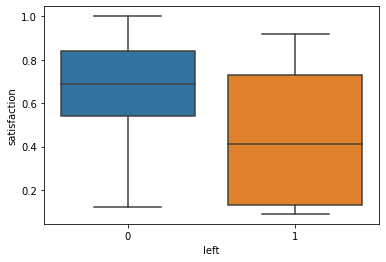

In [23]:
sns.boxplot(x=df.left,y=df.satisfaction)

<AxesSubplot:>

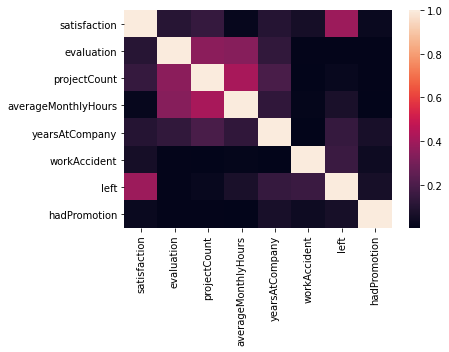

In [24]:
sns.heatmap(abs(df.corr()))

<AxesSubplot:xlabel='averageMonthlyHours', ylabel='evaluation'>

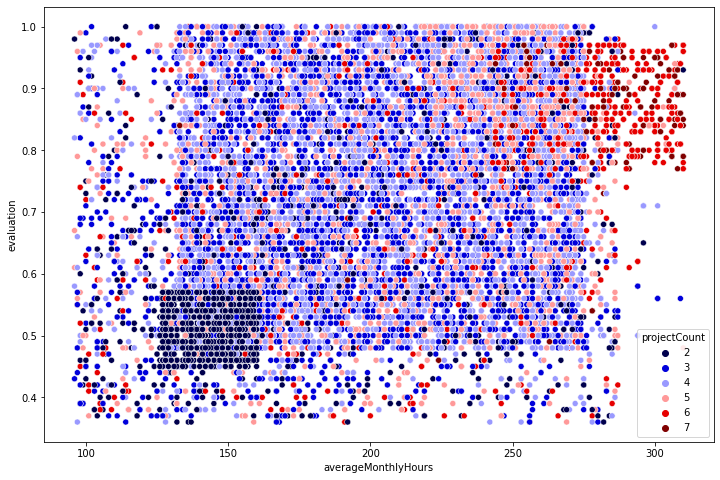

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(ax = ax, x=df.averageMonthlyHours,y=df.evaluation, hue=df.projectCount, palette="seismic")

<AxesSubplot:xlabel='averageMonthlyHours', ylabel='evaluation'>

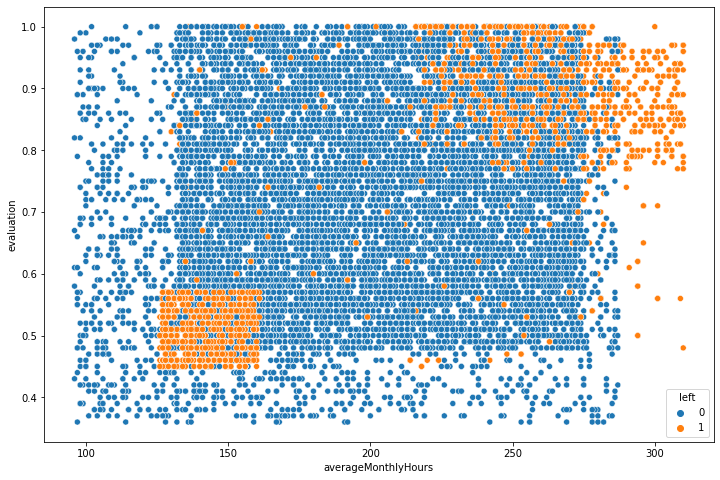

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(ax = ax, x=df.averageMonthlyHours,y=df.evaluation, hue=df.left)

In [27]:
df.yearsAtCompany.describe()


count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: yearsAtCompany, dtype: float64

<AxesSubplot:xlabel='left', ylabel='yearsAtCompany'>

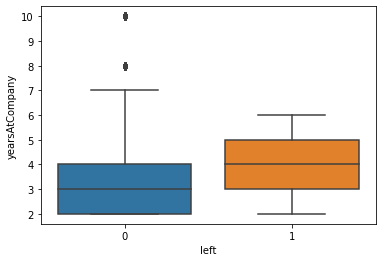

In [28]:
sns.boxplot(y=df.yearsAtCompany,x=df.left)


<AxesSubplot:xlabel='workAccident', ylabel='yearsAtCompany'>

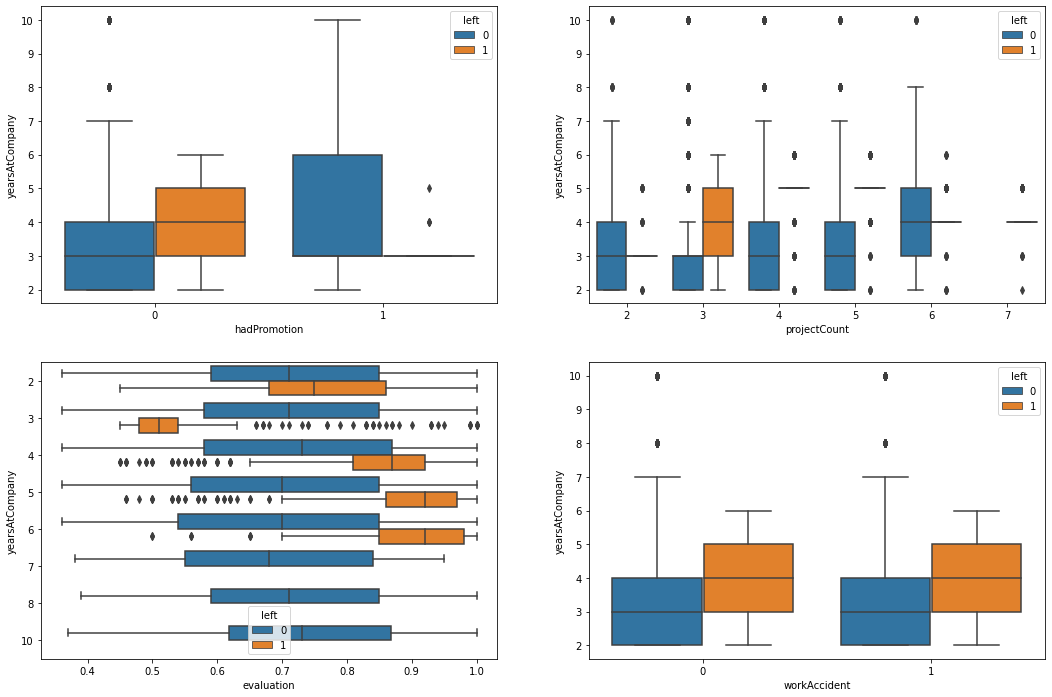

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax = ax1[0],y=df.yearsAtCompany,x=df.hadPromotion,hue=df.left)
sns.boxplot(ax = ax1[1], y=df.yearsAtCompany, x=df.projectCount, hue=df.left)
sns.boxplot(ax = ax2[0], y=df.yearsAtCompany, x=df.evaluation, orient='h', hue=df.left)
sns.boxplot(ax = ax2[1], y=df.yearsAtCompany, x=df.workAccident, hue=df.left)

In [30]:
df['jobStability'] = df.yearsAtCompany.apply(lambda y: 'lessThan3Years' if y <= 3 else 'averageYears' if y < 5  else 'moreThan5Years')
df[['jobStability','yearsAtCompany']]

jobStability  yearsAtCompany
0      lessThan3Years               3
1      moreThan5Years               6
2        averageYears               4
3      moreThan5Years               5
4      lessThan3Years               3
...               ...             ...
14994  lessThan3Years               3
14995  lessThan3Years               3
14996  lessThan3Years               3
14997    averageYears               4
14998  lessThan3Years               3

[14999 rows x 2 columns]

In [31]:
df[['hadPromotion','left']].value_counts()


hadPromotion  left
0             0       11128
              1        3552
1             0         300
              1          19
dtype: int64

In [32]:
df[['workAccident','left']].value_counts(normalize=True)


workAccident  left
0             0       0.628575
              1       0.226815
1             0       0.133342
              1       0.011267
dtype: float64

In [33]:
features = df[['satisfaction','averageMonthlyHours','evaluation','projectCount','yearsAtCompany','workAccident','hadPromotion']].copy()
features = pd.concat([features,pd.get_dummies(df['jobStability'])], axis=1)

In [34]:
features['workAccident'] = features['workAccident'].apply(lambda v: 1 if v else 0)
features['hadPromotion'] = features['hadPromotion'].apply(lambda v: 1 if v else 0)
X = features
X[0:5]

satisfaction  averageMonthlyHours  evaluation  projectCount  \
0          0.38                  157        0.53             2   
1          0.80                  262        0.86             5   
2          0.11                  272        0.88             7   
3          0.72                  223        0.87             5   
4          0.37                  159        0.52             2   

   yearsAtCompany  workAccident  hadPromotion  averageYears  lessThan3Years  \
0               3             0             0             0               1   
1               6             0             0             0               0   
2               4             0             0             1               0   
3               5             0             0             0               0   
4               3             0             0             0               1   

   moreThan5Years  
0               0  
1               1  
2               0  
3               1  
4               0

In [35]:
y = df['left'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [37]:
# Import necessary machine learning libraries
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_model_train, X_validation, y_model_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print ('Model train set:', X_model_train.shape,  y_model_train.shape)
print ('Validation (hyperparameters test) set:', X_validation.shape,  y_validation.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Model train set: (12149, 10) (12149,)
Validation (hyperparameters test) set: (1350, 10) (1350,)
Test set: (1500, 10) (1500,)


In [39]:
def train_tree_with_validation():
    f1_scores = {}
    max_depth = range(1,20)
    impurity_decrease = [0.1,0.01,0.001,0.0001,0]
    for d in max_depth:
        for i in impurity_decrease:
            dTree = DecisionTreeClassifier(criterion="gini", max_depth = d, min_impurity_decrease=i)
            dTree.fit(X_model_train,y_model_train)
            f1_scores[(d,i)] = f1_score(y_validation, dTree.predict(X_validation))
    return max(f1_scores.keys(), key=(lambda key: f1_scores[key]))

In [40]:
best_hyper_values = train_tree_with_validation()
dTree = DecisionTreeClassifier(criterion="gini", max_depth = best_hyper_values[0], min_impurity_decrease=best_hyper_values[1])
dTree.fit(X_train,y_train)
print('Trained a decision tree with max_depth = {} and min_impurity_decrease = {}'.format(best_hyper_values[0],best_hyper_values[1]))
print('F1 score on test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

Trained a decision tree with max_depth = 9 and min_impurity_decrease = 0
F1 score on test set: 0.981


In [41]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_impurity_decrease=0.01)
dTree.fit(X_train,y_train)
print('F1 score with max_depth=4 on the test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

F1 score with max_depth=4 on the test set: 0.966


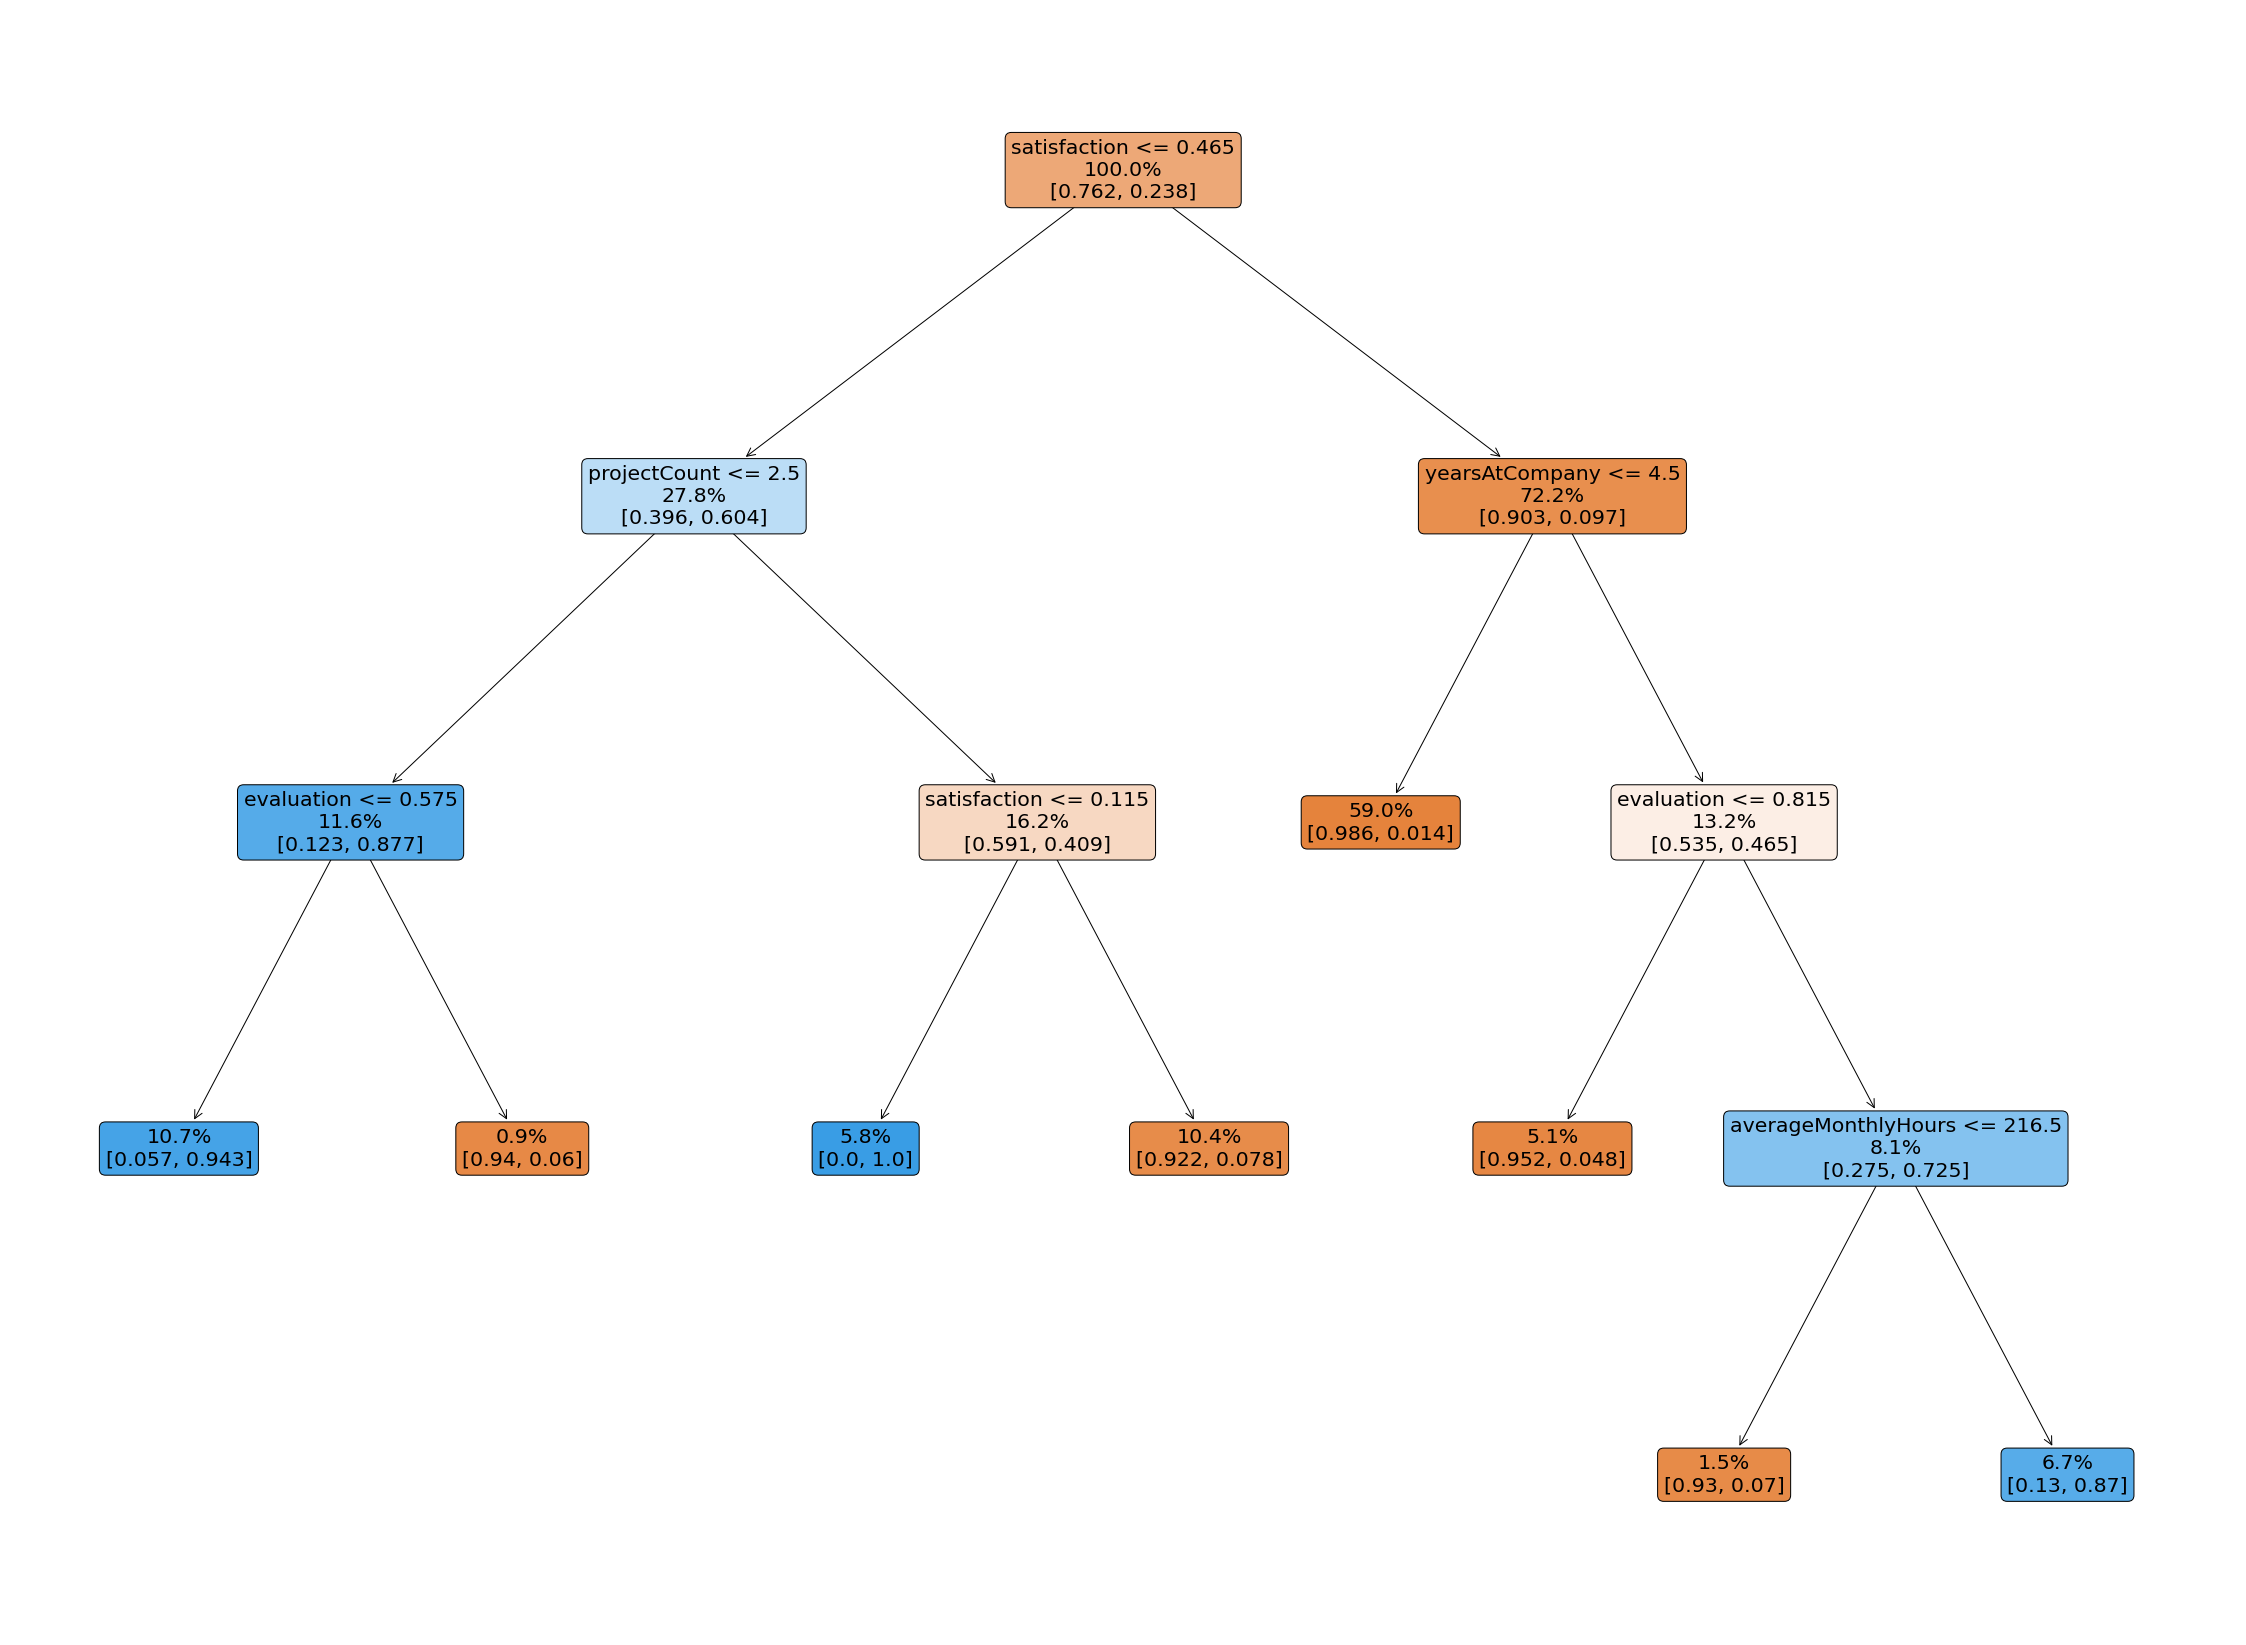

In [42]:
fig, ax = plt.subplots(figsize=(40,30))
tree.plot_tree(dTree, feature_names=features.columns,label='none',filled=True,proportion=True,impurity=False,rounded=True, max_depth=4)
plt.show()

In [48]:
reason1 = df[(df.satisfaction < 0.465)]
reason2 = df[(df.satisfaction < 0.465) & (df.projectCount == 2) & (df.evaluation <= 0.575) ]
reason3 = df[(df.satisfaction <= 0.115) &(df.projectCount >=3)]
reason4 = df[(df.satisfaction > 0.465) & (df.yearsAtCompany >= 5) & (df.evaluation > 0.815) & (df.averageMonthlyHours > 216)]


In [49]:
# print('1. In general, keep satisfaction high. - Satisfaction < 0.465: {:.2%} left'.format(len(reason1[reason1.left])/ len(reason1)))
# print('2. Unhappy, low performers working on only 2 projects leave or are fired - Satisfaction < 0.465, projectCount == 2, evaluation <= 0.575: {:.2%} left'.format(len(reason2[reason2.left])/ len(reason2)))
# print('3. Very unhappy, working on 3 or more projects leave - Satisfaction <= 0.115, projectCount >= 3: {:.2%} left'.format(len(reason3[reason3.left])/ len(reason3)))
# print('4. Long time overworked top-performers leave - Satisfaction > 0.465, yearsAtCompany >= 5, evaluation > 0.815, workingHours > 216: {:.2%} left'.format(len(reason4[reason4.left])/ len(reason4)))